# Model for cifar10 which gives 70-75% val_acc. (hyper-parameters)

In [4]:
import keras
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import cifar10

#train -50000 and test - 10000, 32*32*3
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#convert from 2d - 28*28 to 784*1 
X_train = X_train.reshape(50000,32*32*3)
X_test = X_test.reshape(10000,32*32*3)
print(X_train.shape)
print(X_test.shape)

#normalize
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#categorical to one hot encoded

y_test = to_categorical(y_test, 10)
y_train = to_categorical(y_train, 10)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(50000, 3072)
(10000, 3072)


In [5]:
#Model building 
# ReLU Model

model_new = keras.models.Sequential()

model_new.add(keras.layers.Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer='random_uniform', bias_initializer='random_uniform'))

model_new.add(keras.layers.Dense(units=10, activation='softmax', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

model_new.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

hist=model_new.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 71us/step - loss: 2.1236 - accuracy: 0.2045 - val_loss: 1.9824 - val_accuracy: 0.2658
Epoch 2/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.9195 - accuracy: 0.2946 - val_loss: 1.9179 - val_accuracy: 0.3067
Epoch 3/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.8579 - accuracy: 0.3296 - val_loss: 1.8427 - val_accuracy: 0.3392
Epoch 4/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.8247 - accuracy: 0.3402 - val_loss: 1.8238 - val_accuracy: 0.3501
Epoch 5/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.8043 - accuracy: 0.3497 - val_loss: 1.8134 - val_accuracy: 0.3510
Epoch 6/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.7910 - accuracy: 0.3565 - val_loss: 1.7917 - val_accuracy: 0.3658
Epoch 7/100
40000/40000 [==============================] - 3s 

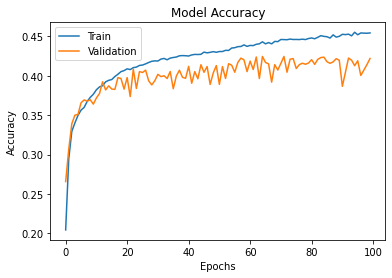

In [7]:
#Plot accuracy vs val acc
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [8]:
#setting all ones 

model_new.add(keras.layers.Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer='ones', bias_initializer='ones'))

model_new.add(keras.layers.Dense(units=10, activation='softmax', kernel_initializer='ones', bias_initializer='ones'))

model_new.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

hist=model_new.fit(X_train, y_train, epochs=100, validation_split=0.2)



Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 72us/step - loss: 2.3055 - accuracy: 0.0989 - val_loss: 2.3061 - val_accuracy: 0.0977
Epoch 2/100
40000/40000 [==============================] - 3s 71us/step - loss: 2.3057 - accuracy: 0.0983 - val_loss: 2.3052 - val_accuracy: 0.0952
Epoch 3/100
40000/40000 [==============================] - 3s 71us/step - loss: 2.3058 - accuracy: 0.0985 - val_loss: 2.3043 - val_accuracy: 0.1003
Epoch 4/100
40000/40000 [==============================] - 3s 72us/step - loss: 2.3057 - accuracy: 0.0968 - val_loss: 2.3043 - val_accuracy: 0.1003
Epoch 5/100
40000/40000 [==============================] - 3s 71us/step - loss: 2.3059 - accuracy: 0.0989 - val_loss: 2.3034 - val_accuracy: 0.0977
Epoch 6/100
40000/40000 [==============================] - 3s 70us/step - loss: 2.3060 - accuracy: 0.0984 - val_loss: 2.3031 - val_accuracy: 0.1022
Epoch 7/100
40000/40000 [==============================] - 3s 

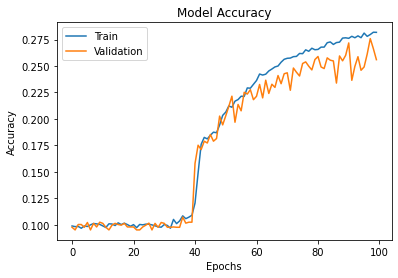

In [9]:
#Plot accuracy vs val acc

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [10]:
'ones'
#set to a constant value 

intial = keras.initializers.Constant(value=0.45)

model_new.add(keras.layers.Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer=intial, bias_initializer=intial))

model_new.add(keras.layers.Dense(units=10, activation='softmax', kernel_initializer=intial, bias_initializer=intial))

model_new.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

hist=model_new.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 84us/step - loss: 2.3033 - accuracy: 0.0986 - val_loss: 2.3042 - val_accuracy: 0.0977
Epoch 2/100
40000/40000 [==============================] - 3s 80us/step - loss: 2.3034 - accuracy: 0.0978 - val_loss: 2.3032 - val_accuracy: 0.1025
Epoch 3/100
40000/40000 [==============================] - 3s 80us/step - loss: 2.3034 - accuracy: 0.0990 - val_loss: 2.3034 - val_accuracy: 0.0952
Epoch 4/100
40000/40000 [==============================] - 3s 80us/step - loss: 2.3032 - accuracy: 0.0996 - val_loss: 2.3030 - val_accuracy: 0.1014
Epoch 5/100
40000/40000 [==============================] - 3s 81us/step - loss: 2.3033 - accuracy: 0.0987 - val_loss: 2.3039 - val_accuracy: 0.0952
Epoch 6/100
40000/40000 [==============================] - 3s 80us/step - loss: 2.3034 - accuracy: 0.0981 - val_loss: 2.3032 - val_accuracy: 0.0977
Epoch 7/100
40000/40000 [==============================] - 3s 

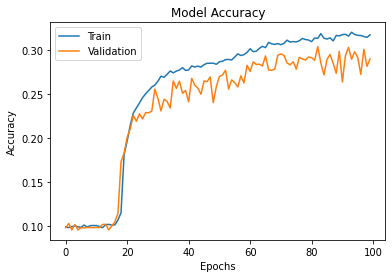

In [11]:
#Plot accuracy vs val acc

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [12]:
#pick values from a normal distribution

intial_randnorm = keras.initializers.RandomNormal(mean=0.0, stddev=0.25)

model_new.add(keras.layers.Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer=intial_randnorm, bias_initializer=intial_randnorm))

model_new.add(keras.layers.Dense(units=10, activation='softmax', kernel_initializer=intial_randnorm, bias_initializer=intial_randnorm))

model_new.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

hist=model_new.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 78us/step - loss: 2.2869 - accuracy: 0.1781 - val_loss: 2.2451 - val_accuracy: 0.1769
Epoch 2/100
40000/40000 [==============================] - 3s 77us/step - loss: 2.1383 - accuracy: 0.1847 - val_loss: 2.0591 - val_accuracy: 0.1769
Epoch 3/100
40000/40000 [==============================] - 3s 82us/step - loss: 1.9510 - accuracy: 0.2083 - val_loss: 1.9778 - val_accuracy: 0.2224
Epoch 4/100
40000/40000 [==============================] - 3s 77us/step - loss: 1.8818 - accuracy: 0.2569 - val_loss: 1.9608 - val_accuracy: 0.2646
Epoch 5/100
40000/40000 [==============================] - 3s 76us/step - loss: 1.8483 - accuracy: 0.2880 - val_loss: 1.9501 - val_accuracy: 0.2794
Epoch 6/100
40000/40000 [==============================] - 3s 81us/step - loss: 1.8253 - accuracy: 0.3013 - val_loss: 1.9275 - val_accuracy: 0.2866
Epoch 7/100
40000/40000 [==============================] - 3s 

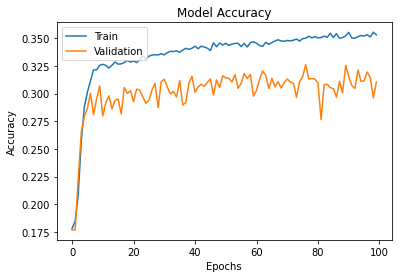

In [13]:
#Plot accuracy vs val acc

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [14]:
#pick values uniformly at random from an interval

intial_randintv = keras.initializers.RandomUniform(minval=-0.05, maxval=0.-0.05)

model_new.add(keras.layers.Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer=intial_randintv, bias_initializer=intial_randintv))

model_new.add(keras.layers.Dense(units=10, activation='softmax', kernel_initializer=intial_randintv, bias_initializer=intial_randintv))

model_new.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

hist=model_new.fit(X_train, y_train, epochs=100, validation_split=0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 86us/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 2/100
40000/40000 [==============================] - 4s 90us/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/100
40000/40000 [==============================] - 4s 98us/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 4/100
40000/40000 [==============================] - 4s 109us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/100
40000/40000 [==============================] - 4s 103us/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/100
40000/40000 [==============================] - 4s 91us/step - loss: 2.3027 - accuracy: 0.1018 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 7/100
40000/40000 [==============================] - 4

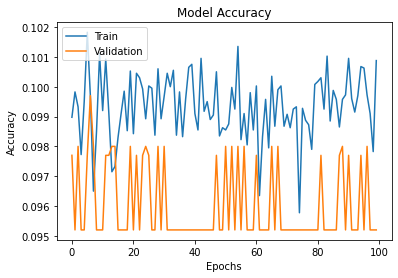

In [15]:
#Plot accuracy vs val acc

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [16]:
#pick values from truncated normal distribution - any value beyond 99.5Confidence interval or 2 standard dev from mean


intial_truncnorm = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1)

model_new.add(keras.layers.Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer=intial_truncnorm, bias_initializer=intial_truncnorm))

model_new.add(keras.layers.Dense(units=10, activation='softmax', kernel_initializer=intial_truncnorm, bias_initializer=intial_truncnorm))

model_new.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

hist=model_new.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 101us/step - loss: 2.3047 - accuracy: 0.0991 - val_loss: 2.3031 - val_accuracy: 0.1025
Epoch 2/100
40000/40000 [==============================] - 4s 94us/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 3/100
40000/40000 [==============================] - 4s 93us/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 4/100
40000/40000 [==============================] - 4s 95us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 5/100
40000/40000 [==============================] - 4s 93us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 6/100
40000/40000 [==============================] - 4s 90us/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 7/100
40000/40000 [==============================] - 4s

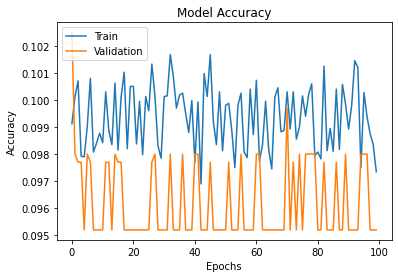

In [17]:
#Plot accuracy vs val acc

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

Using 2 hidden layers with more number of units 

In [19]:
model = models.Sequential()
model.add(Dense(units=200, activation='relu', input_dim=3072)  )
model.add(Dense(units=200, activation='relu') )
model.add(Dense(units=10, activation='softmax') )
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=100, batch_size = 32, validation_split=0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 9s 234us/step - loss: 1.9156 - accuracy: 0.3106 - val_loss: 1.7880 - val_accuracy: 0.3594
Epoch 2/100
40000/40000 [==============================] - 9s 230us/step - loss: 1.7268 - accuracy: 0.3876 - val_loss: 1.7039 - val_accuracy: 0.3908
Epoch 3/100
40000/40000 [==============================] - 9s 226us/step - loss: 1.6450 - accuracy: 0.4179 - val_loss: 1.6419 - val_accuracy: 0.4177
Epoch 4/100
40000/40000 [==============================] - 9s 221us/step - loss: 1.5887 - accuracy: 0.4369 - val_loss: 1.6435 - val_accuracy: 0.4084
Epoch 5/100
40000/40000 [==============================] - 9s 233us/step - loss: 1.5463 - accuracy: 0.4528 - val_loss: 1.5687 - val_accuracy: 0.4491
Epoch 6/100
40000/40000 [==============================] - 10s 248us/step - loss: 1.5079 - accuracy: 0.4681 - val_loss: 1.5624 - val_accuracy: 0.4475
Epoch 7/100
40000/40000 [==============================

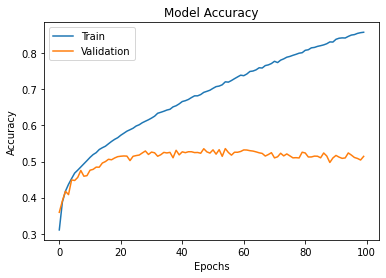

In [20]:
#Plot accuracy vs val acc

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')